In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# Set global parameters
mpl.rcParams['font.size'] = 14  # Set global font size for titles, labels, etc.
mpl.rcParams['axes.titlesize'] = 14  # Title size
mpl.rcParams['axes.labelsize'] = 14  # X and Y label size
mpl.rcParams['legend.fontsize'] = 14  # Legend font size
mpl.rcParams['xtick.labelsize'] = 14  # X-tick label size
mpl.rcParams['ytick.labelsize'] = 14  # Y-tick label size
mpl.rcParams['font.family'] = 'Arial'  # Set font family globally
# Set font weight for axis labels to bold
#mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['axes.titleweight'] = 'bold'  # Title weight (bold)

## Camera 1 focus

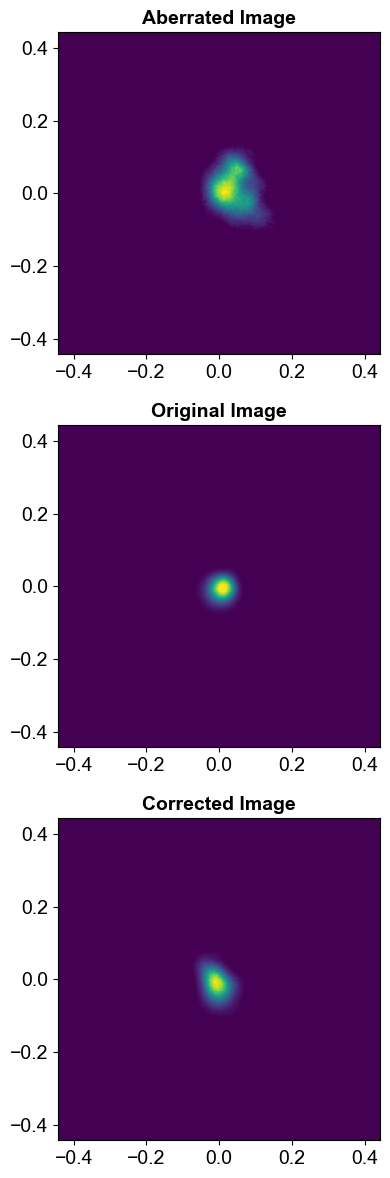

the aberrated coefficient: [0.6744637768041183]
the corrected coefficient: [0.853700754065406]


In [29]:
import cv2
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from skimage import filters
from skimage.measure import regionprops

arr_abb = []
arr_cor = []

for i in range(1):
    # abberated"
    # path_1 = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_1_abb\1_idx_2024-08-07 17-28-02_c1_1.png"
    # path_1 = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_1_abb\2_idx_2024-08-07 17-28-06_c1_1.png"
    #path_1 = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_1_abb\3_idx_2024-08-07 17-28-10_c1_1.png"
    # original
    #path_2 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\Reference_Images\camera_1_reference\1_idx_2024-08-07 17-44-02_c1_1.png'
    # corrected
    #path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_1_cor\1_idx_2024-08-08 08-25-02_c1_1.png'
    # path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_1_cor\2_idx_2024-08-08 08-25-06_c1_1.png'
    #path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_1_cor\3_idx_2024-08-08 08-25-10_c1_1.png'

    #best mse 187
    # path_1 = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_1_abb\187_idx_2024-08-07 17-40-26_c1_1.png"
    # path_2 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\Reference_Images\camera_1_reference\1_idx_2024-08-07 17-44-02_c1_1.png'
    # path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_1_cor\187_idx_2024-08-08 08-37-26_c1_1.png'

    # # worst mse 192
    path_1 = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_1_abb\192_idx_2024-08-07 17-40-46_c1_1.png"
    path_2 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\Reference_Images\camera_1_reference\1_idx_2024-08-07 17-44-02_c1_1.png'
    path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_1_cor\192_idx_2024-08-08 08-37-46_c1_1.png'


    im1 = cv2.imread(path_1)
    im1 = rgb2gray(im1)
    im2 = cv2.imread(path_2)
    im2 = rgb2gray(im2)
    im3 = cv2.imread(path_3)
    im3 = rgb2gray(im3)
    
    image = im2
    threshold_value = filters.threshold_otsu(image)
    labeled_foreground = (image > threshold_value).astype(int)
    properties = regionprops(labeled_foreground, image)
    center_of_mass = properties[0].centroid
    weighted_center_of_mass = properties[0].weighted_centroid

    colorized = label2rgb(labeled_foreground, image, colors=['black', 'red'], alpha=0.1)

    # camera 1
    a = 80
    im1 = im1[1132-a:1132+a, 1072-a:1072+a]
    #im1 = im1[1115-a:1115+a, 1069-a:1069+a]
    im1 = im1 / np.max(im1)
    im2 = im2[1131-a:1131+a, 1080-a:1080+a]
    im2 = im2 / np.max(im2)
    im3 = im3[1126-a:1126+a, 1085-a:1085+a]
    im3 = im3 / np.max(im3)

   
    
    xxx = np.linspace(-80*0.0055, 80*0.0055, 160)
    yyy = np.linspace(-80*0.0055, 80*0.0055, 160)
    dx = (xxx[1] - xxx[0]) / 2.
    dy = (yyy[1] - yyy[0]) / 2.
    extent = [xxx[0] - dx, xxx[-1] + dx, yyy[0] - dy, yyy[-1] + dy]
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

    ax1.imshow(im1, extent=extent)
    ax1.set_title("Aberrated Image")
    ax2.imshow(im2, extent=extent)
    ax2.set_title("Original Image")
    ax3.imshow(im3, extent=extent)
    ax3.set_title("Corrected Image")
    
    plt.tight_layout()
    plt.show()

    im1 = im1.flatten()
    im2 = im2.flatten()
    im3 = im3.flatten()
    
    im4 = im1
    im5 = im2
    im6 = im3
    
    co_abb = (np.sum(im4 * im5)) / np.sqrt(np.sum(im4**2)) / np.sqrt(np.sum(im5**2))
    arr_abb.append(co_abb)
    co_cor = (np.sum(im6 * im5)) / np.sqrt(np.sum(im6**2)) / np.sqrt(np.sum(im5**2))
    arr_cor.append(co_cor)

print('the aberrated coefficient:', arr_abb)
print('the corrected coefficient:', arr_cor)


# Camera 2 Defocus

(1072.8046257721592, 895.9395201838817)


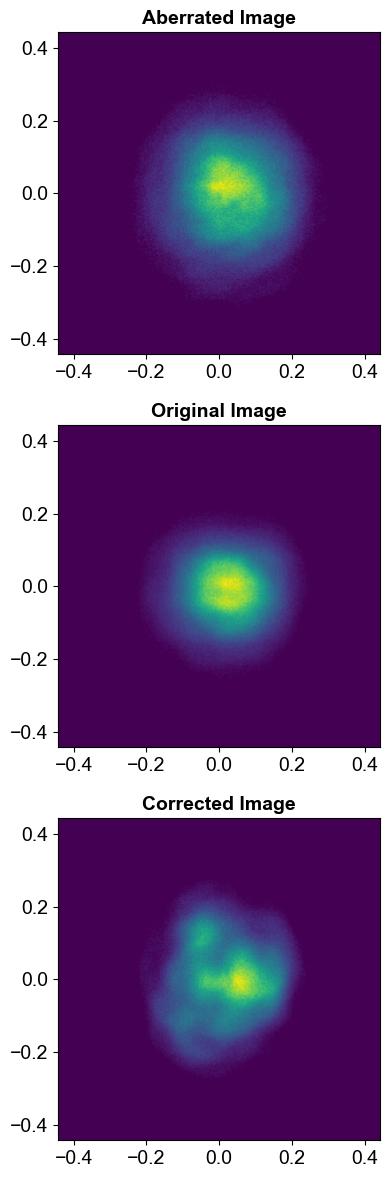

the aberrated coefficient: [0.9487849018098437]
the corrected coefficient: [0.9440193157737765]


In [19]:
import cv2
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from skimage import filters
from skimage.measure import regionprops

arr_abb = []
arr_cor = []

for i in range(1):
    # abberated
    #path_1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_2_abb\1_idx_2024-08-07 17-28-02_c2_1.png'
    #path_1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_2_abb\2_idx_2024-08-07 17-28-06_c2_1.png'
    #path_1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_2_abb\3_idx_2024-08-07 17-28-10_c2_1.png'
    # original
    #path_2 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\Reference_Images\camera_2_reference\1_idx_2024-08-07 17-44-02_c2_1.png'
    #corrected
    #path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_2_cor\1_idx_2024-08-08 08-25-02_c2_1.png'
    # path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_2_cor\2_idx_2024-08-08 08-25-06_c2_1.png'
    #path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_2_cor\3_idx_2024-08-08 08-25-10_c2_1.png'

    # # best mse 
    # path_1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_2_abb\187_idx_2024-08-07 17-40-26_c2_1.png'
    # path_2 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\Reference_Images\camera_2_reference\1_idx_2024-08-07 17-44-02_c2_1.png'
    # path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_2_cor\187_idx_2024-08-08 08-37-26_c2_1.png'

    # best mse 
    path_1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_2_abb\192_idx_2024-08-07 17-40-46_c2_1.png'
    path_2 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\Reference_Images\camera_2_reference\1_idx_2024-08-07 17-44-02_c2_1.png'
    path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_2_cor\192_idx_2024-08-08 08-37-46_c2_1.png'


    im1 = cv2.imread(path_1)
    im1 = rgb2gray(im1)
    im2 = cv2.imread(path_2)
    im2 = rgb2gray(im2)
    im3 = cv2.imread(path_3)
    im3 = rgb2gray(im3)
    
    image = im3
    threshold_value = filters.threshold_otsu(image)
    labeled_foreground = (image > threshold_value).astype(int)
    properties = regionprops(labeled_foreground, image)
    center_of_mass = properties[0].centroid
    weighted_center_of_mass = properties[0].weighted_centroid
    print(center_of_mass)
    colorized = label2rgb(labeled_foreground, image, colors=['black', 'red'], alpha=0.1)

    # camera 1
    a = 120
    im1 = im1[1072-a:1072+a, 894-a:894+a]
    im1 = im1 / np.max(im1)
    im2 = im2[1072-a:1072+a, 894-a:894+a]
    im2 = im2 / np.max(im2)
    im3 = im3[1072-a:1072+a, 894-a:894+a]
    im3 = im3 / np.max(im3)

   
    
    xxx = np.linspace(-80*0.0055, 80*0.0055, 160)
    yyy = np.linspace(-80*0.0055, 80*0.0055, 160)
    dx = (xxx[1] - xxx[0]) / 2.
    dy = (yyy[1] - yyy[0]) / 2.
    extent = [xxx[0] - dx, xxx[-1] + dx, yyy[0] - dy, yyy[-1] + dy]
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

    ax1.imshow(im1, extent=extent)
    ax1.set_title("Aberrated Image")
    ax2.imshow(im2, extent=extent)
    ax2.set_title("Original Image")
    ax3.imshow(im3, extent=extent)
    ax3.set_title("Corrected Image")
    
    plt.tight_layout()
    plt.show()

    im1 = im1.flatten()
    im2 = im2.flatten()
    im3 = im3.flatten()
    
    im4 = im1
    im5 = im2
    im6 = im3
    
    co_abb = (np.sum(im4 * im5)) / np.sqrt(np.sum(im4**2)) / np.sqrt(np.sum(im5**2))
    arr_abb.append(co_abb)
    co_cor = (np.sum(im6 * im5)) / np.sqrt(np.sum(im6**2)) / np.sqrt(np.sum(im5**2))
    arr_cor.append(co_cor)

print('the aberrated coefficient:', arr_abb)
print('the corrected coefficient:', arr_cor)

# Calculate the Korrelationcoefficient Camera 1

In [26]:
#import the images 
from scipy import signal
import cv2
import numpy as np
# check the center and crop the image
import matplotlib.pyplot as plt
from skimage.color import label2rgb
import imageio as iio
from skimage import filters
from skimage.color import rgb2gray  # only needed for incorrectly saved images
from skimage.measure import regionprops
import os
#calculate the coefficient from the equation in our paper
arr_abb=[]
arr_cor=[]
 
 
for i in range(1,201):
    # abberated
    path_1= r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_1_abb'
    # compensated
    path_2= r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_1_cor'
    # corrected
    path_3= r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\Reference_Images\camera_1_reference'

    # Read aberrated image
    aberrated_files = [f for f in os.listdir(path_1) if f.startswith(f"{i}_")]
    if aberrated_files:
        print(aberrated_files)
        im1 = cv2.imread(os.path.join(path_1, aberrated_files[0]))
        im1 = rgb2gray(im1)
        #print(np.shape(im1))
    
    # Read compensated image
    compensated_files = [f for f in os.listdir(path_2) if f.startswith(f"{i}_")]
    if compensated_files:
        print(compensated_files)
        im2 = cv2.imread(os.path.join(path_2, compensated_files[0]))
        im2 = rgb2gray(im2)
        #print(np.shape(im2))
    
    # Read reference image (assuming there's only one reference image)
    im3 = cv2.imread(os.path.join(path_3, '1_idx_2024-08-07 17-44-02_c1_1.png'))
    im3 = rgb2gray(im3)
    #print(np.shape(im3))

    image=im3
    threshold_value = filters.threshold_otsu(image)
    labeled_foreground = (image > threshold_value).astype(int)
    properties = regionprops(labeled_foreground, image)
    center_of_mass = properties[0].centroid
    weighted_center_of_mass = properties[0].weighted_centroid
    print(center_of_mass)
    colorized = label2rgb(labeled_foreground, image, colors=['black', 'red'], alpha=0.1)
 
    a = 80
    im1 = im1[1132-a:1132+a, 1072-a:1072+a]
    #m1 = im1[1115-a:1115+a, 1069-a:1069+a]
    im1 = im1 / np.max(im1)
    im2 = im2[1126-a:1126+a, 1085-a:1085+a]
    im2 = im2 / np.max(im2)
    im3 = im3[1131-a:1131+a, 1080-a:1080+a]
    im3 = im3 / np.max(im3)

    # plot the physical coordinate
    xxx=np.linspace(-80*0.0055,80*0.0055, 160)
    yyy=np.linspace(-80*0.0055,80*0.0055, 160)
    dx = (xxx[1]-xxx[0])/2.
    dy = (yyy[1]-yyy[0])/2.
    extent = [xxx[0]-dx,  xxx[-1]+dx, yyy[0]-dy, yyy[-1]+dy]      # xx[-1] is the last paramter
    #fig, [ax1, ax2, ax3] = plt.subplots(3,1)
 
    #ax1.imshow(im1,extent=extent)
    #ax2.imshow(im2,extent=extent)
    #ax3.imshow(im3,extent=extent)
    im1=im1.flatten()
    im2=im2.flatten()
    im3=im3.flatten()
    # same like Matlab coeff
    im4 = im1 # abberated
    im5 = im2 # compensated
    im6 = im3 # original
    
    co_abb = (np.sum(im4 * im6)) / np.sqrt(np.sum(im4**2)) / np.sqrt(np.sum(im6**2))
    arr_abb.append(co_abb)
    print(arr_abb)
    co_cor = (np.sum(im5 * im6)) / np.sqrt(np.sum(im5**2)) / np.sqrt(np.sum(im6**2))
    arr_cor.append(co_cor)
    print(arr_cor)

print('the aberrated coefficient:',arr_abb)
print('the corrected coefficient:',arr_cor)

['1_idx_2024-08-07 17-28-02_c1_1.png']
['1_idx_2024-08-08 08-25-02_c1_1.png']
(1131.9928057553957, 1080.9208633093526)
[0.46860282470786396]
[0.6274557085572586]
['2_idx_2024-08-07 17-28-06_c1_1.png']
['2_idx_2024-08-08 08-25-06_c1_1.png']
(1131.9928057553957, 1080.9208633093526)
[0.46860282470786396, 0.5773536942071579]
[0.6274557085572586, 0.8551585931535206]
['3_idx_2024-08-07 17-28-10_c1_1.png']
['3_idx_2024-08-08 08-25-10_c1_1.png']
(1131.9928057553957, 1080.9208633093526)
[0.46860282470786396, 0.5773536942071579, 0.5787516076667445]
[0.6274557085572586, 0.8551585931535206, 0.6881212616153258]
['4_idx_2024-08-07 17-28-14_c1_1.png']
['4_idx_2024-08-08 08-25-14_c1_1.png']
(1131.9928057553957, 1080.9208633093526)
[0.46860282470786396, 0.5773536942071579, 0.5787516076667445, 0.4551502593982266]
[0.6274557085572586, 0.8551585931535206, 0.6881212616153258, 0.9641527788581109]
['5_idx_2024-08-07 17-28-18_c1_1.png']
['5_idx_2024-08-08 08-25-18_c1_1.png']
(1131.9928057553957, 1080.92086330

## Plot the result

Index: 187, MSE: 0.0018761514220386744
Index: 38, MSE: 0.0021643389482051134
Index: 28, MSE: 0.0023649646900594234
Index: 195, MSE: 0.0027138448785990477
Index: 173, MSE: 0.003203389933332801
Index: 116, MSE: 0.0034369698259979486
Index: 77, MSE: 0.003488684305921197
Index: 140, MSE: 0.004220847971737385
Index: 66, MSE: 0.004223300144076347
Index: 86, MSE: 0.00451707374304533
Index: 15, MSE: 0.004592238925397396
Index: 26, MSE: 0.004770903382450342
Index: 121, MSE: 0.0047807167284190655
Index: 167, MSE: 0.004880079533904791
Index: 113, MSE: 0.00529004679992795
Index: 85, MSE: 0.005648202262818813
Index: 73, MSE: 0.005997357424348593
Index: 20, MSE: 0.006113090552389622
Index: 199, MSE: 0.006140964105725288
Index: 97, MSE: 0.006251837592571974
Index: 118, MSE: 0.006475961767137051
Index: 112, MSE: 0.0065023405477404594
Index: 182, MSE: 0.0065445913933217525
Index: 135, MSE: 0.006669263821095228
Index: 110, MSE: 0.00682842917740345
Index: 74, MSE: 0.006843122188001871
Index: 91, MSE: 0.0

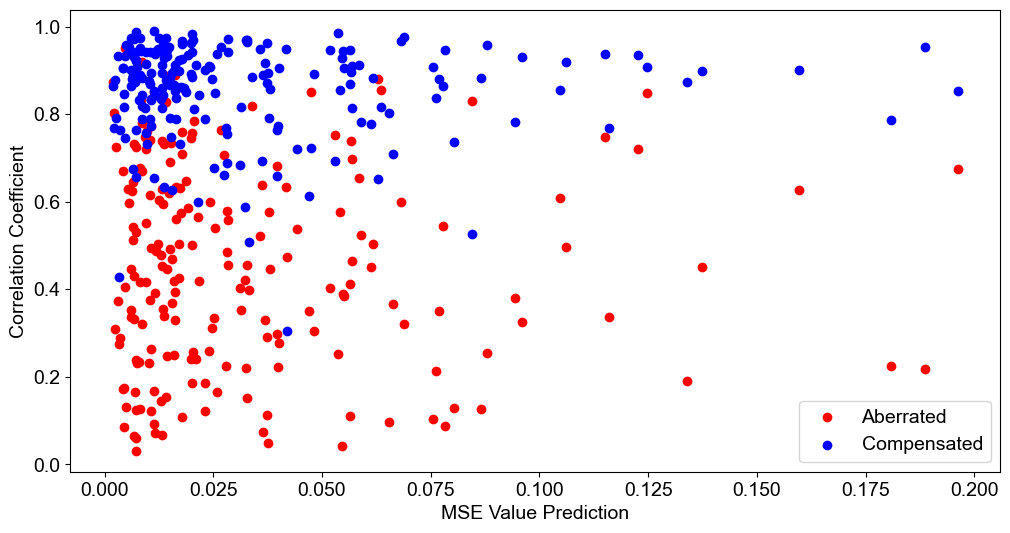

In [27]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Datei einlesen
with open(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\mse_unwrapped.txt') as file:
    content = file.readlines()

# MSE-Werte extrahieren
mse_values = []
mse_count = 0
for line in content:
    match = re.search(r'MSE: (\d+\.\d+)', line)
    if match:
        mse_count += 1
        mse_values.append((mse_count, float(match.group(1))))
        if mse_count == 200:
            break

# Sortiere die MSE-Werte und behalte die Indizes
sorted_mse_indices_with_mse = sorted(mse_values, key=lambda x: x[1])

# Ausgabe zur Überprüfung
for index, mse in sorted_mse_indices_with_mse:
    print(f"Index: {index}, MSE: {mse}")

# Extrahiere die MSE-Werte in der sortierten Reihenfolge
sorted_mse_values = [mse for _, mse in sorted_mse_indices_with_mse]

# Extrahiere die Indizes in der sortierten Reihenfolge
sorted_indices = [index for index, _ in sorted_mse_indices_with_mse]

# Konvertiere die Indizes in ein numpy-Array und passe an für 0-basiertes Indexing
sorted_indices_array = np.array(sorted_indices).astype(int) - 1  # Sicherstellen, dass es ein 1D-Array ist

# Konvertiere arr_abb und arr_cor in NumPy-Arrays, falls sie Listen sind
arr_abb = np.array(arr_abb)
arr_cor = np.array(arr_cor)

# Überprüfung der Array-Formen
print(f"Shape of sorted_indices_array: {sorted_indices_array.shape}")
print(f"Shape of arr_abb: {arr_abb.shape}")
print(f"Shape of arr_cor: {arr_cor.shape}")

# Reordne die Arrays basierend auf den sortierten Indizes
arr_abb_sorted = arr_abb[sorted_indices_array]  # arr_abb wird mit 1D-Array indiziert
arr_cor_sorted = arr_cor[sorted_indices_array]  # arr_cor wird mit 1D-Array indiziert

# Berechnungen wie vorher
improvement = arr_cor_sorted - arr_abb_sorted
mean_improvement = np.mean(improvement)
mean_arr_abb = np.mean(arr_abb_sorted)
mean_arr_cor = np.mean(arr_cor_sorted)

# Ergebnisse drucken
print(f"Mean Improvement: {mean_improvement}")
print(f"Mean Correlationcoefficient Aberration: {mean_arr_abb}")
print(f"Mean Correlationcoefficient Correction: {mean_arr_cor}")

# Plotten
plt.figure(figsize=(12, 6))

# Plot von arr_abb_sorted und arr_cor_sorted gegen die sortierten MSE-Werte
plt.scatter(sorted_mse_values, arr_abb_sorted, label="Aberrated", color='red')
plt.scatter(sorted_mse_values, arr_cor_sorted, label="Compensated", color='blue')

plt.xlabel("MSE Value Prediction")
plt.ylabel("Correlation Coefficient")
plt.legend(fontsize=14)  # Legenden-Schriftgröße anpassen
plt.xticks(fontsize=14)  # x-Achse Beschriftung Schriftgröße anpassen
plt.yticks(fontsize=14)  # y-Achse Beschriftung Schriftgröße anpassen
plt.show()

200
200
Mean Improvement: 0.39933470366667706
Mean Correlationcoefficient Abberation: 0.4554639741850693
Mean Correlationcoefficient Correction: 0.8547986778517463


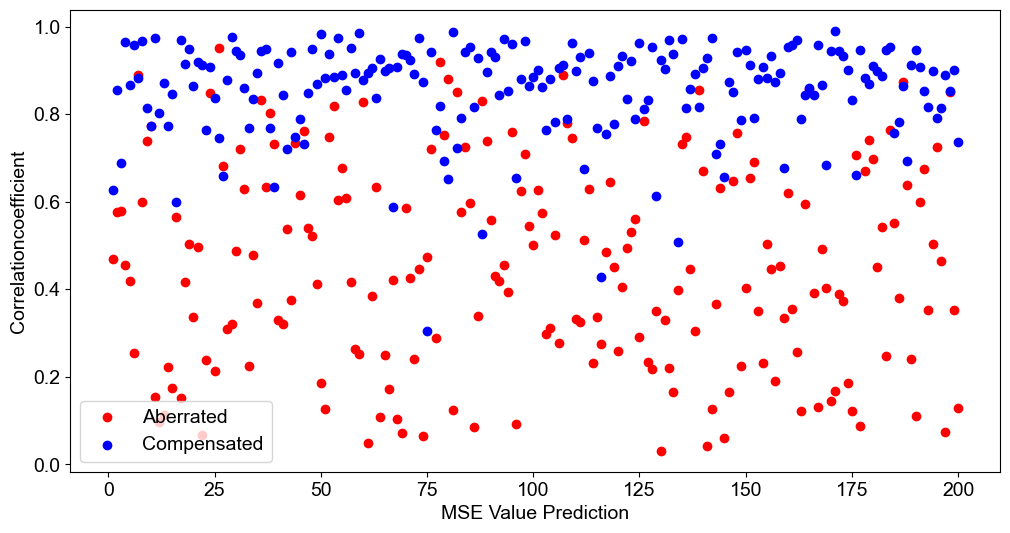

In [28]:
print(len(arr_abb))
print(len(arr_cor))
# Calculate the mean improvement
arr_abb = np.array(arr_abb)
arr_cor = np.array(arr_cor)

# Calculate the improvement for each pair of values
improvement = arr_cor - arr_abb


# Calculate the mean improvement
mean_improvement = np.mean(improvement)
mean_arr_abb = np.mean(arr_abb)
mean_arr_cor = np.mean(arr_cor)

# Print the mean improvement
print(f"Mean Improvement: {mean_improvement}")
print(f"Mean Correlationcoefficient Abberation: {mean_arr_abb}")
print(f"Mean Correlationcoefficient Correction: {mean_arr_cor}")

plt.figure(figsize=(12, 6))

plt.scatter(range(1, len(arr_abb) + 1), arr_abb, label="Aberrated", color='red')
plt.scatter(range(1, len(arr_cor) + 1), arr_cor, label="Compensated", color='blue')
#plt.title(" Camera 2 Aberrated vs Compensated", fontdict={'fontsize': 12, 'fontname': 'Arial', 'fontweight': 'bold'})
plt.xlabel("MSE Value Prediction")
plt.ylabel("Correlationcoefficient")
plt.legend(fontsize=14)  # Adjusting legend font size
plt.xticks(fontsize=14)  # Adjusting x-tick labels font size
plt.yticks(fontsize=14)  # Adjusting y-tick labels font size
plt.show()

# Calculate the Correlation Coeff Camera 2

In [13]:
#import the images 
from scipy import signal
import cv2
import numpy as np
# check the center and crop the image
import matplotlib.pyplot as plt
from skimage.color import label2rgb
import imageio as iio
from skimage import filters
from skimage.color import rgb2gray  # only needed for incorrectly saved images
from skimage.measure import regionprops
import os
#calculate the coefficient from the equation in our paper
arr_abb=[]
arr_cor=[]
 
 
for i in range(1,201):
    # abberated
    path_1= r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_2_abb'
    # compensated
    path_2= r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_2_cor'
    # corrected
    path_3= r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\Reference_Images\camera_2_reference'

    # Read aberrated image
    aberrated_files = [f for f in os.listdir(path_1) if f.startswith(f"{i}_")]
    if aberrated_files:
        print(aberrated_files)
        im1 = cv2.imread(os.path.join(path_1, aberrated_files[0]))
        im1 = rgb2gray(im1)
        #print(np.shape(im1))
    
    # Read compensated image
    compensated_files = [f for f in os.listdir(path_2) if f.startswith(f"{i}_")]
    if compensated_files:
        print(compensated_files)
        im2 = cv2.imread(os.path.join(path_2, compensated_files[0]))
        im2 = rgb2gray(im2)
        #print(np.shape(im2))
    
    # Read reference image (assuming there's only one reference image)
    im3 = cv2.imread(os.path.join(path_3, '1_idx_2024-08-07 17-44-02_c2_1.png'))
    im3 = rgb2gray(im3)
    #print(np.shape(im3))

    image=im3
    threshold_value = filters.threshold_otsu(image)
    labeled_foreground = (image > threshold_value).astype(int)
    properties = regionprops(labeled_foreground, image)
    center_of_mass = properties[0].centroid
    weighted_center_of_mass = properties[0].weighted_centroid
    print(center_of_mass)
    colorized = label2rgb(labeled_foreground, image, colors=['black', 'red'], alpha=0.1)
 
    a = 80
    im1 = im1[1072-a:1072+a, 894-a:894+a]
    im1 = im1 / np.max(im1)
    im2 = im2[1072-a:1072+a, 894-a:894+a]
    im2 = im2 / np.max(im2)
    im3 = im3[1072-a:1072+a, 894-a:894+a]
    im3 = im3 / np.max(im3)
    
    # plot the physical coordinate
    xxx=np.linspace(-80*0.0055,80*0.0055, 160)
    yyy=np.linspace(-80*0.0055,80*0.0055, 160)
    dx = (xxx[1]-xxx[0])/2.
    dy = (yyy[1]-yyy[0])/2.
    extent = [xxx[0]-dx,  xxx[-1]+dx, yyy[0]-dy, yyy[-1]+dy]      # xx[-1] is the last paramter
    #fig, [ax1, ax2, ax3] = plt.subplots(3,1)
 
    #ax1.imshow(im1,extent=extent)
    #ax2.imshow(im2,extent=extent)
    #ax3.imshow(im3,extent=extent)
    im1=im1.flatten()
    im2=im2.flatten()
    im3=im3.flatten()
    # same like Matlab coeff
    im4 = im1 # abberated
    im5 = im2 # compensated
    im6 = im3 # original
    
    co_abb = (np.sum(im4 * im6)) / np.sqrt(np.sum(im4**2)) / np.sqrt(np.sum(im6**2))
    arr_abb.append(co_abb)
    print(arr_abb)
    co_cor = (np.sum(im5 * im6)) / np.sqrt(np.sum(im5**2)) / np.sqrt(np.sum(im6**2))
    arr_cor.append(co_cor)
    print(arr_cor)

print('the aberrated coefficient:',arr_abb)
print('the corrected coefficient:',arr_cor)

['1_idx_2024-08-07 17-28-02_c2_1.png']
['1_idx_2024-08-08 08-25-02_c2_1.png']
(1075.2705479452054, 900.4922374429224)
[0.8406111152397749]
[0.9337606452573176]
['2_idx_2024-08-07 17-28-06_c2_1.png']
['2_idx_2024-08-08 08-25-06_c2_1.png']
(1075.2705479452054, 900.4922374429224)
[0.8406111152397749, 0.9400834593122027]
[0.9337606452573176, 0.9737351703390926]
['3_idx_2024-08-07 17-28-10_c2_1.png']
['3_idx_2024-08-08 08-25-10_c2_1.png']
(1075.2705479452054, 900.4922374429224)
[0.8406111152397749, 0.9400834593122027, 0.9152710419848055]
[0.9337606452573176, 0.9737351703390926, 0.9509730099663426]
['4_idx_2024-08-07 17-28-14_c2_1.png']
['4_idx_2024-08-08 08-25-14_c2_1.png']
(1075.2705479452054, 900.4922374429224)
[0.8406111152397749, 0.9400834593122027, 0.9152710419848055, 0.8942193128692396]
[0.9337606452573176, 0.9737351703390926, 0.9509730099663426, 0.9345635476178538]
['5_idx_2024-08-07 17-28-18_c2_1.png']
['5_idx_2024-08-08 08-25-18_c2_1.png']
(1075.2705479452054, 900.4922374429224)
[0

## Plot the results

In [32]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Datei einlesen
with open(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\mse_unwrapped.txt') as file:
    content = file.readlines()

# MSE-Werte extrahieren
mse_values = []
mse_count = 0
for line in content:
    match = re.search(r'MSE: (\d+\.\d+)', line)
    if match:
        mse_count += 1
        mse_values.append((mse_count, float(match.group(1))))
        if mse_count == 200:
            break

# Sortiere die MSE-Werte und behalte die Indizes
sorted_mse_indices_with_mse = sorted(mse_values, key=lambda x: x[1])
print(sorted_mse_indices_with_mse)

# Ausgabe zur Überprüfung
for index, mse in sorted_mse_indices_with_mse:
    print(f"Index: {index}, MSE: {mse}")

# Extrahiere die MSE-Werte in der sortierten Reihenfolge
sorted_mse_values = [mse for _, mse in sorted_mse_indices_with_mse]

# Extrahiere die Indizes in der sortierten Reihenfolge
sorted_indices = [index for index, _ in sorted_mse_indices_with_mse]

# Konvertiere die Indizes in ein numpy-Array und passe an für 0-basiertes Indexing
sorted_indices_array = np.array(sorted_indices).astype(int) - 1  # Sicherstellen, dass es ein 1D-Array ist

# Konvertiere arr_abb und arr_cor in NumPy-Arrays, falls sie Listen sind
arr_abb = np.array(arr_abb)
arr_cor = np.array(arr_cor)

# Überprüfung der Array-Formen
print(f"Shape of sorted_indices_array: {sorted_indices_array.shape}")
print(f"Shape of arr_abb: {arr_abb.shape}")
print(f"Shape of arr_cor: {arr_cor.shape}")

# Reordne die Arrays basierend auf den sortierten Indizes
arr_abb_sorted = arr_abb[sorted_indices_array]  # arr_abb wird mit 1D-Array indiziert
arr_cor_sorted = arr_cor[sorted_indices_array]  # arr_cor wird mit 1D-Array indiziert

# Berechnungen wie vorher
improvement = arr_cor_sorted - arr_abb_sorted
mean_improvement = np.mean(improvement)
mean_arr_abb = np.mean(arr_abb_sorted)
mean_arr_cor = np.mean(arr_cor_sorted)

# Ergebnisse drucken
print(f"Mean Improvement: {mean_improvement}")
print(f"Mean Correlationcoefficient Aberration: {mean_arr_abb}")
print(f"Mean Correlationcoefficient Correction: {mean_arr_cor}")

# Plotten
plt.figure(figsize=(12, 6))

# Plot von arr_abb_sorted und arr_cor_sorted gegen die sortierten MSE-Werte
plt.scatter(sorted_mse_values, arr_abb_sorted, label="Aberrated", color='red')
plt.scatter(sorted_mse_values, arr_cor_sorted, label="Compensated", color='blue')

plt.xlabel("MSE Value Prediction")
plt.ylabel("Correlation Coefficient")
plt.legend(fontsize=14)  # Legenden-Schriftgröße anpassen
plt.xticks(fontsize=14)  # x-Achse Beschriftung Schriftgröße anpassen
plt.yticks(fontsize=14)  # y-Achse Beschriftung Schriftgröße anpassen
plt.show()

[(187, 0.0018761514220386744), (38, 0.0021643389482051134), (28, 0.0023649646900594234), (195, 0.0027138448785990477), (173, 0.003203389933332801), (116, 0.0034369698259979486), (77, 0.003488684305921197), (140, 0.004220847971737385), (66, 0.004223300144076347), (86, 0.00451707374304533), (15, 0.004592238925397396), (26, 0.004770903382450342), (121, 0.0047807167284190655), (167, 0.004880079533904791), (113, 0.00529004679992795), (85, 0.005648202262818813), (73, 0.005997357424348593), (20, 0.006113090552389622), (199, 0.006140964105725288), (97, 0.006251837592571974), (118, 0.006475961767137051), (112, 0.0065023405477404594), (182, 0.0065445913933217525), (135, 0.006669263821095228), (110, 0.00682842917740345), (74, 0.006843122188001871), (91, 0.006883928552269936), (146, 0.0070287869311869144), (84, 0.0071258763782680035), (23, 0.00712787127122283), (81, 0.007135812193155289), (145, 0.007185610011219978), (130, 0.007233847863972187), (123, 0.007286436390131712), (154, 0.007492280099540

IndexError: index 186 is out of bounds for axis 0 with size 1

1
1
Mean Improvement: 0.17923697726128773
Mean Correlationcoefficient Abberation: 0.6744637768041183
Mean Correlationcoefficient Correction: 0.853700754065406


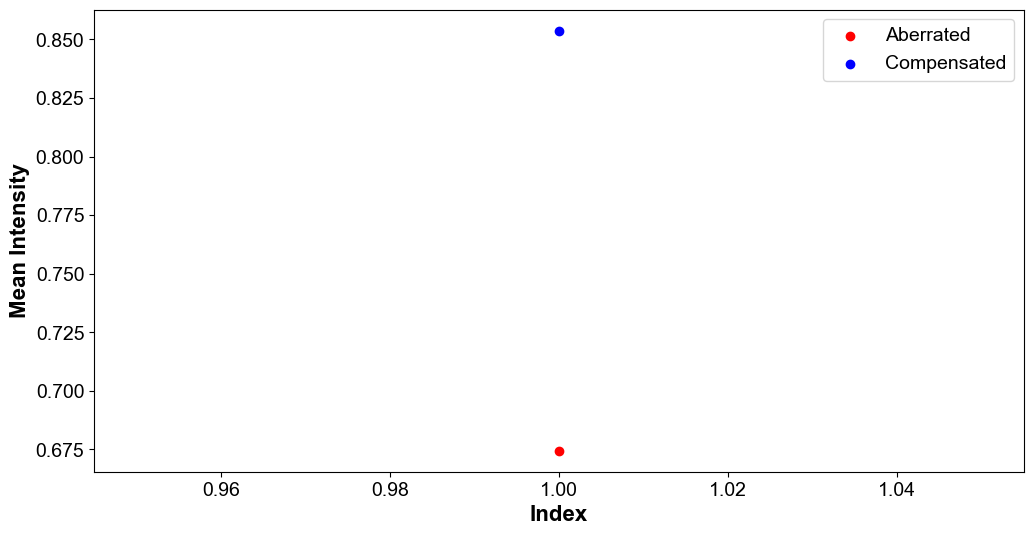

In [30]:
print(len(arr_abb))
print(len(arr_cor))
# Calculate the mean improvement
arr_abb = np.array(arr_abb)
arr_cor = np.array(arr_cor)

# Calculate the improvement for each pair of values
improvement = arr_cor - arr_abb


# Calculate the mean improvement
mean_improvement = np.mean(improvement)
mean_arr_abb = np.mean(arr_abb)
mean_arr_cor = np.mean(arr_cor)

# Print the mean improvement
print(f"Mean Improvement: {mean_improvement}")
print(f"Mean Correlationcoefficient Abberation: {mean_arr_abb}")
print(f"Mean Correlationcoefficient Correction: {mean_arr_cor}")

plt.figure(figsize=(12, 6))

plt.scatter(range(1, len(arr_abb) + 1), arr_abb, label="Aberrated", color='red')
plt.scatter(range(1, len(arr_cor) + 1), arr_cor, label="Compensated", color='blue')
#plt.title(" Camera 2 Aberrated vs Compensated", fontdict={'fontsize': 12, 'fontname': 'Arial', 'fontweight': 'bold'})
plt.xlabel("Index", fontdict={'fontsize': 16, 'fontname': 'Arial', 'fontweight': 'bold'})
plt.ylabel("Mean Intensity", fontdict={'fontsize': 16, 'fontname': 'Arial', 'fontweight': 'bold'})
plt.legend(fontsize=14)  # Adjusting legend font size
plt.xticks(fontsize=14)  # Adjusting x-tick labels font size
plt.yticks(fontsize=14)  # Adjusting y-tick labels font size
plt.show()

# Create compensated Phasemask

one test example

In [ ]:
import cv2
import imageio.v2 as iio
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from LightPipes import *
import math
 
# read an image 
img_orginal = iio.imread(r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\phasemask_unwrapped\1.png")
img_pre=iio.imread(r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\phasemask_unwrapped_predict_index_original_size\1_idx_predicted_phasemask_original_size_1.png")
# Output Images
from matplotlib.pyplot import figure
figure(figsize=(10, 12), dpi=300)
plt.subplot(1,2,1)
plt.imshow(img_orginal,cmap='gray')
print(np.max(img_orginal))
plt.subplot(1,2,2)
plt.imshow(img_pre,cmap='gray')
print(np.max(img_pre))
 
#change the phase profile from gray value to phase value with the orginal phase mask
 
phase_orginal=16/255*(img_orginal)       # change the gray value to 16
T=np.exp(1j*phase_orginal)
 
#change the phase profile from gray value to phase value with the predicted phase mask
 
phase_pre=16/255*(img_pre)       # change the gray value to 16
T=np.exp(-1j*phase_pre)
 
# generate the transmitted function and also the wrapped phase function to display on SLM
 
T=np.exp(1j*phase_orginal)*np.exp(-1j*phase_pre)
Phase_compensation=np.angle(T)
 
 
# plot all the three images
 
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(5, 5))
im1=ax1.imshow(phase_orginal,cmap='gray')
plt.colorbar(im1,shrink=0.6)
 
im2=ax2.imshow(phase_pre,cmap='gray')
plt.colorbar(im2,shrink=0.6)
 
im3=ax3.imshow(Phase_compensation,cmap='gray')
plt.colorbar(im3,shrink=0.6)

# Specify the file path where you want to save the image
output_file_path = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\output\compensated_phase.png"

# Save the compensated phase image
plt.imsave(output_file_path, Phase_compensation, cmap='gray')

In [ ]:
import cv2
import imageio.v2 as iio
import matplotlib.pyplot as plt
import numpy as np
from LightPipes import *
import math
import os
import glob

# Define base paths and file naming conventions
base_path_original = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\camera_1"
base_path_predicted = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\phasemask_unwrapped_predict_index_original_size"
output_base_path = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\phasemask_unwrapped_compensated"

# List of indices to process#
indices = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12]  # Add more indices as needed
#indices = list(range(1,201))

for idx in indices:
    # Search for files with the given index
    original_files = glob.glob(os.path.join(base_path_original, f"{idx}_*.png"))
    predicted_files = glob.glob(os.path.join(base_path_predicted, f"{idx}_*.png"))
    
    if original_files and predicted_files:
        original_file = original_files[0]
        predicted_file = predicted_files[0]
        output_file = os.path.join(output_base_path, f"{idx}_idx_compensated_phase.png")

        # read an image 
        print(f'{original_file} vs {predicted_file}' )
        img_orginal = iio.imread(original_file)
        img_pre = iio.imread(predicted_file)
        
        # Change the phase profile from gray value to phase value with the original phase mask
        phase_orginal = 16 / 255 * (img_orginal)  # change the gray value to 16
        T = np.exp(1j * phase_orginal)
        
        # Change the phase profile from gray value to phase value with the predicted phase mask
        phase_pre = 16 / 255 * (img_pre)  # change the gray value to 16
        T = np.exp(-1j * phase_pre)
        
        # Generate the transmitted function and also the wrapped phase function to display on SLM
        T = np.exp(1j * phase_orginal) * np.exp(-1j * phase_pre)
        Phase_compensation = np.angle(T)
        print(f' Min: {np.min(Phase_compensation)} Max: {np.max(Phase_compensation)}')
        #print(f'{Phase_compensation.shape}')

        # change to gray image
        Phase_compensation =(Phase_compensation+np.pi)*255/(2*np.pi)
        print(f' Min: {np.min(Phase_compensation)} Max: {np.max(Phase_compensation)}')
        
        # Save the compensated phase image
        cv2.imwrite(output_file, Phase_compensation)

print("Processing complete.")
